In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [327]:
dataset = pd.read_csv('Housing.csv')

In [328]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [329]:
dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [330]:
furnished_map = {'furnished': 1, 'unfurnished': 0, 'semi-furnished': 2}
guestroom_map = {'yes': 1, 'no': 0}
basement_map = {'yes': 1, 'no': 0}
mainroad_map = {'yes': 1, 'no': 0}
hotwaterheating_map = {'yes': 1, 'no': 0}
airconditioning_map = {'yes': 1, 'no': 0}
prefarea_map = {'yes': 1, 'no': 0}

In [331]:
dataset['furnishingstatus'] = dataset['furnishingstatus'].replace(furnished_map)
dataset['guestroom'] = dataset['guestroom'].replace(guestroom_map)
dataset['basement'] = dataset['basement'].replace(basement_map)
dataset['hotwaterheating'] = dataset['hotwaterheating'].replace(hotwaterheating_map)
dataset['airconditioning'] = dataset['airconditioning'].replace(airconditioning_map)
dataset['prefarea'] = dataset['prefarea'].replace(prefarea_map)
dataset['mainroad'] = dataset['mainroad'].replace(mainroad_map)


C:\Users\shark\AppData\Local\Temp\ipykernel_6868\3017529444.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['furnishingstatus'] = dataset['furnishingstatus'].replace(furnished_map)
C:\Users\shark\AppData\Local\Temp\ipykernel_6868\3017529444.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['guestroom'] = dataset['guestroom'].replace(guestroom_map)
C:\Users\shark\AppData\Local\Temp\ipykernel_6868\3017529444.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ver

In [332]:
dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


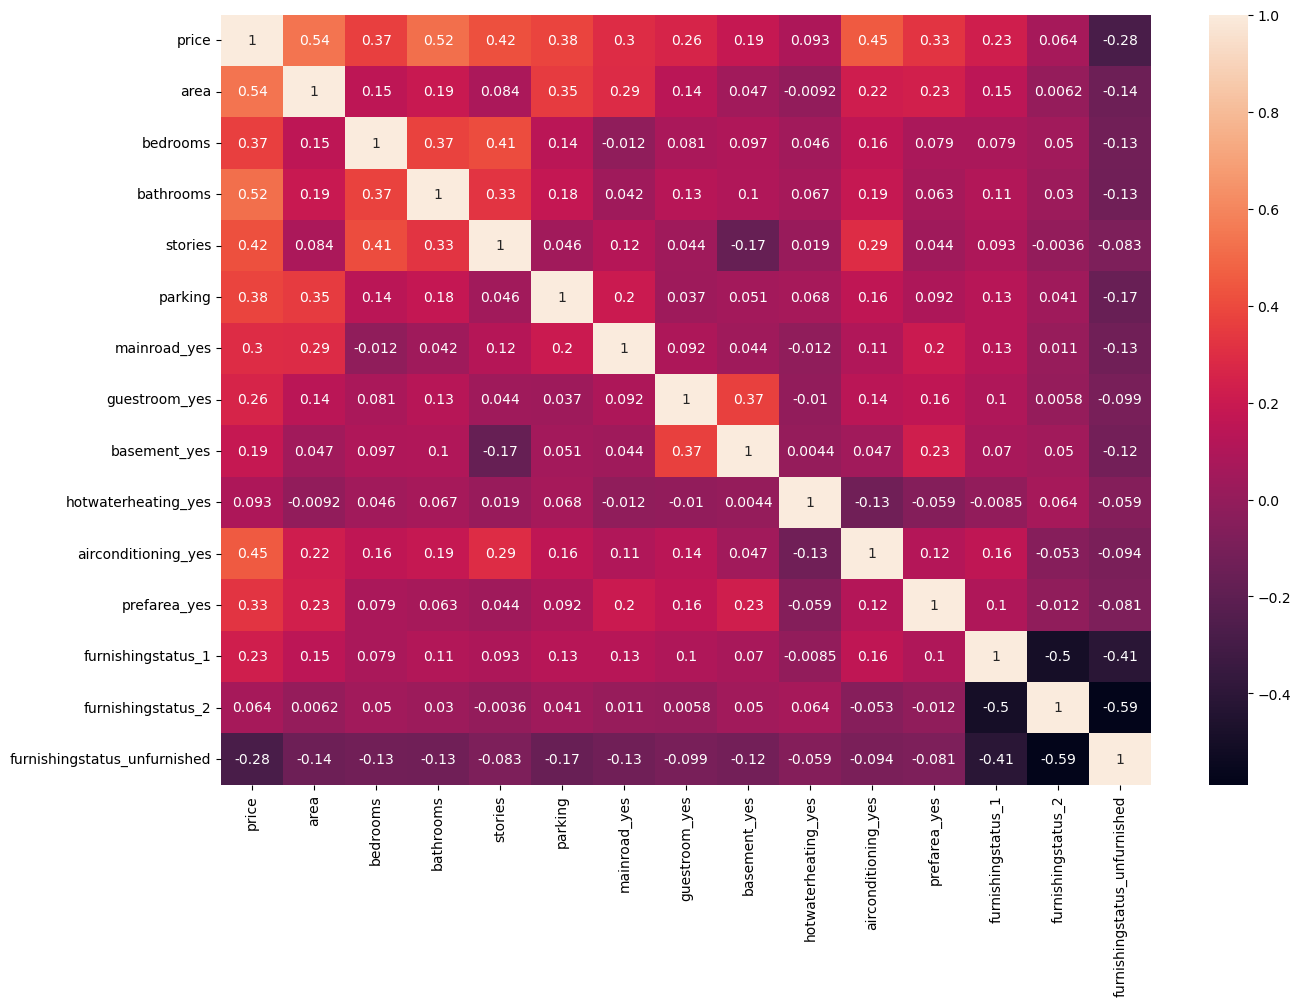

In [333]:

plt.figure(figsize=(15, 10))
sns.heatmap(dataset_numeric.corr(), annot=True)
plt.show()

In [334]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [335]:
x = dataset.iloc[:, 1:]
y = dataset['price']    

In [336]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,1


In [337]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [338]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-0.104869
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-0.104869
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,1.061527
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-0.104869
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-0.104869
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-1.271264
541,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.061527
542,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.271264
543,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.104869


In [339]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [340]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [341]:
lr = LinearRegression()
la = Lasso(alpha=5) # alpha is the lambda, the higher the value of alpha the more the regularization
rr = Ridge(alpha=5) # alpha is the lambda, the higher the value of alpha the more the regularization

In [342]:
lr.fit(x_train, y_train)
la.fit(x_train, y_train)
rr.fit(x_train, y_train)

# checking the accuracy of the model
print(f'Linear Regression: {'%.5f' %(lr.score(x_test, y_test))}')
print(f'Lasso: {'%.5f' %(la.score(x_test, y_test))}')
print(f'Ridge: {'%.5f' %(rr.score(x_test, y_test))}')

Linear Regression: 0.66610
Lasso: 0.66610
Ridge: 0.66763


In [343]:
print(f'Coeefficients of Linear Regression: {lr.coef_}')
print(f'Coeefficients of Lasso: {la.coef_}')
print(f'Coeefficients of Ridge: {rr.coef_}')

Coeefficients of Linear Regression: [550543.72376167  95234.94358374 501816.14115339 381539.02211027
 164503.11177083 166460.17608793 159456.22805545 258340.85929587
 419604.63424436 195907.6853298  297784.33039923 154152.70522032]
Coeefficients of Lasso: [550542.61895919  95234.31540822 501814.91796519 381536.35702677
 164500.06126689 166457.97775832 159453.22817618 258334.72482072
 419601.55603669 195906.50773937 297782.21128048 154149.47992015]
Coeefficients of Ridge: [545095.66069585  98998.58874536 497490.38724074 378076.17036105
 164816.26535592 166764.30694661 157939.9929887  254290.62188798
 416623.9971855  197097.00524685 296589.29961045 153392.06357704]


### Linerar Regression

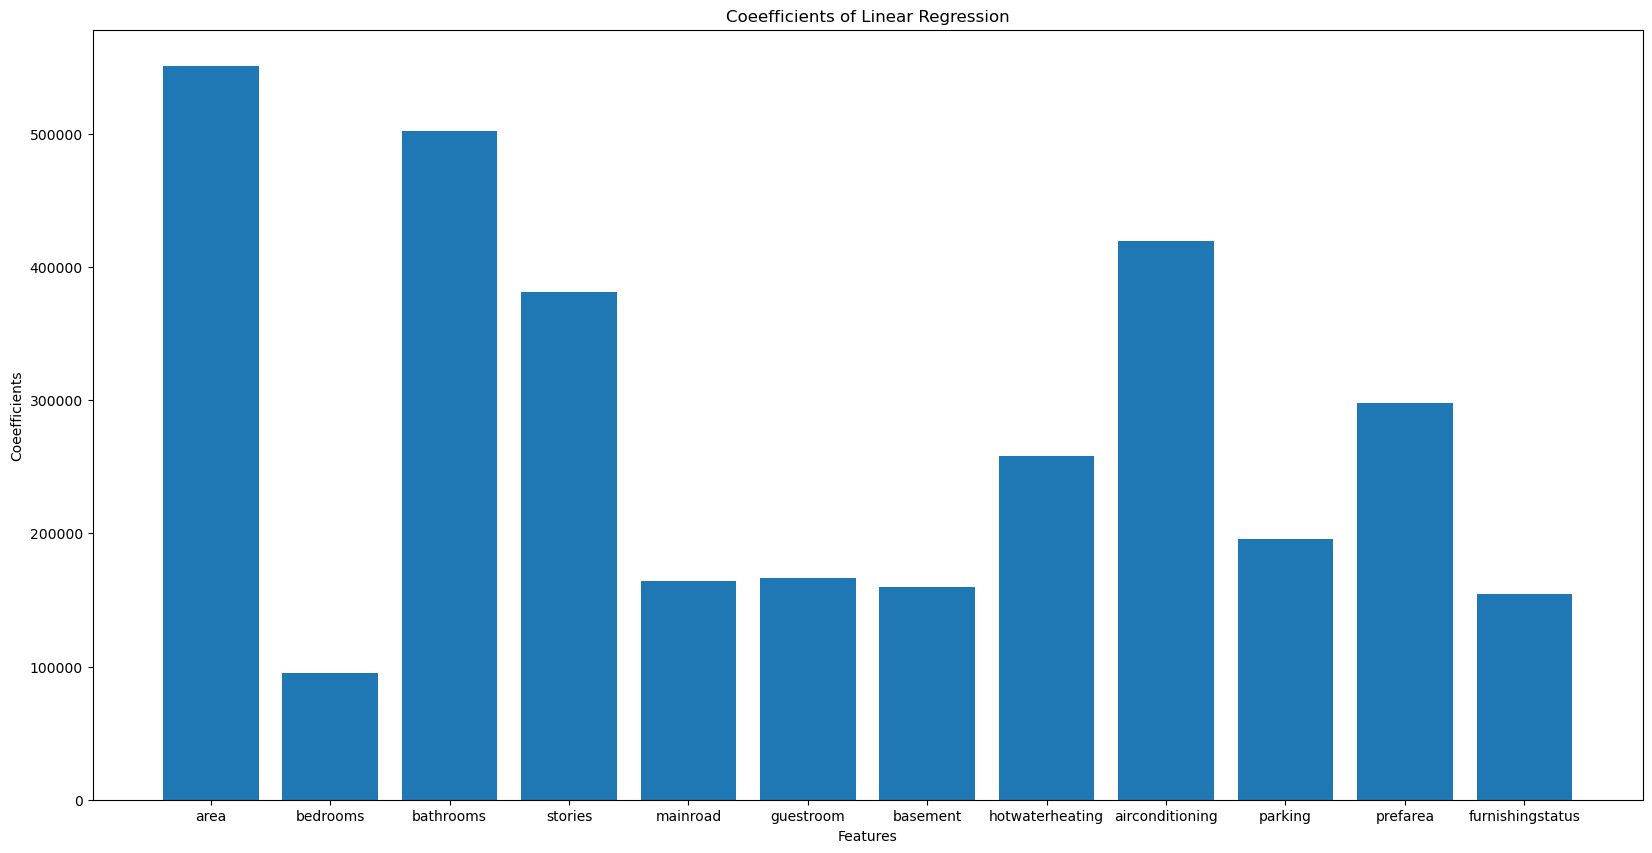

In [344]:
plt.figure(figsize=(20, 10))
plt.bar(x.columns, lr.coef_)
plt.title('Coeefficients of Linear Regression')
plt.xlabel('Features')
plt.ylabel('Coeefficients')
plt.show()

## Lasso

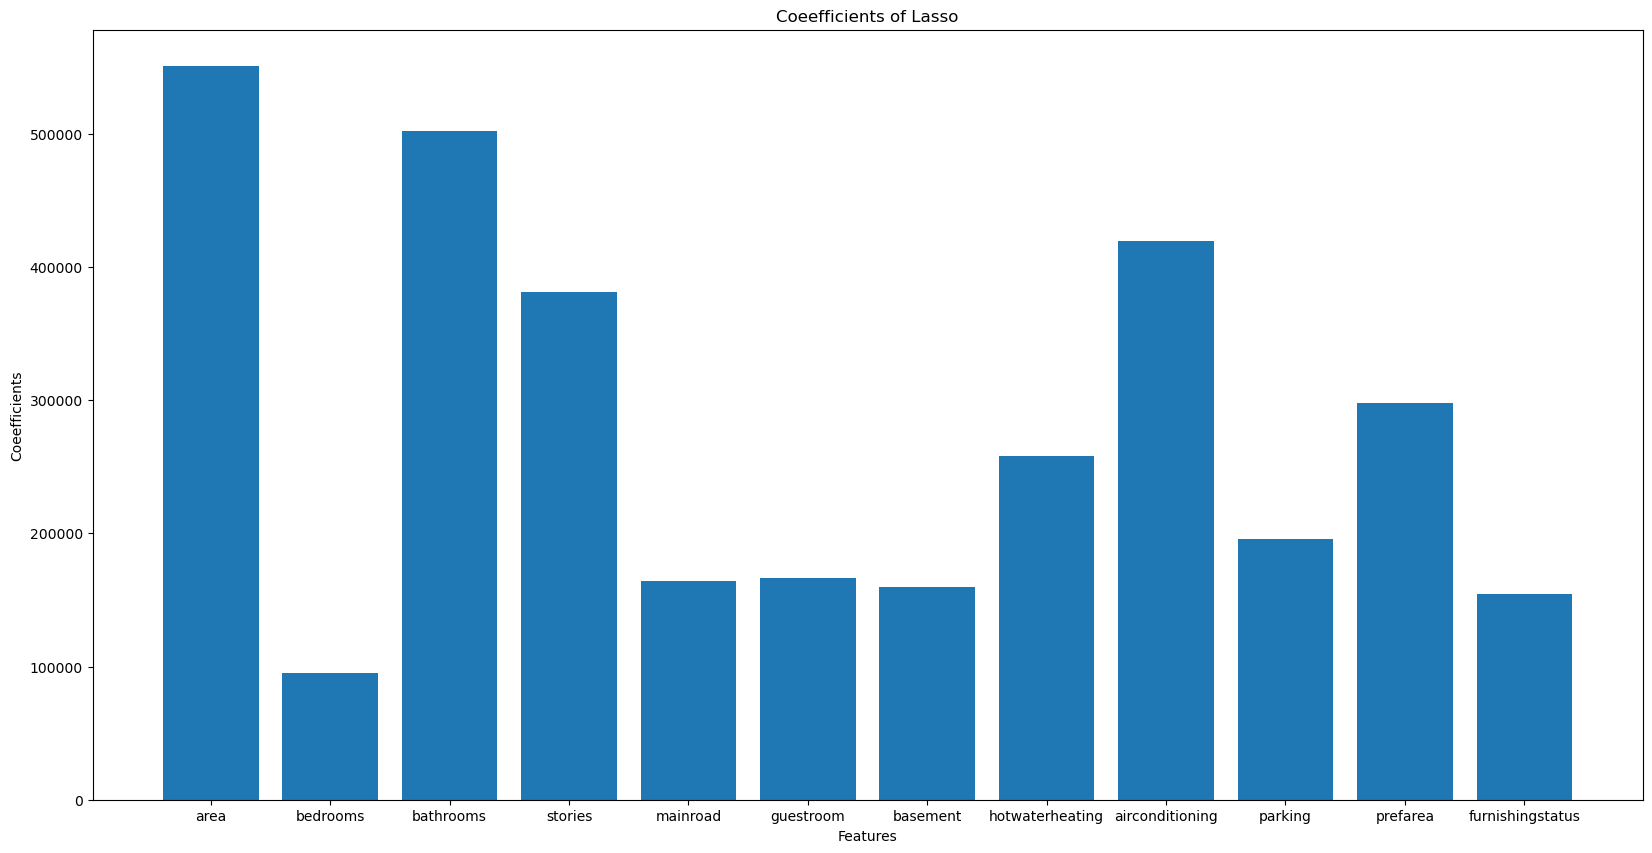

In [345]:
plt.figure(figsize=(20, 10))
plt.bar(x.columns, la.coef_)
plt.title('Coeefficients of Lasso')
plt.xlabel('Features')
plt.ylabel('Coeefficients')
plt.show()

## Ridge

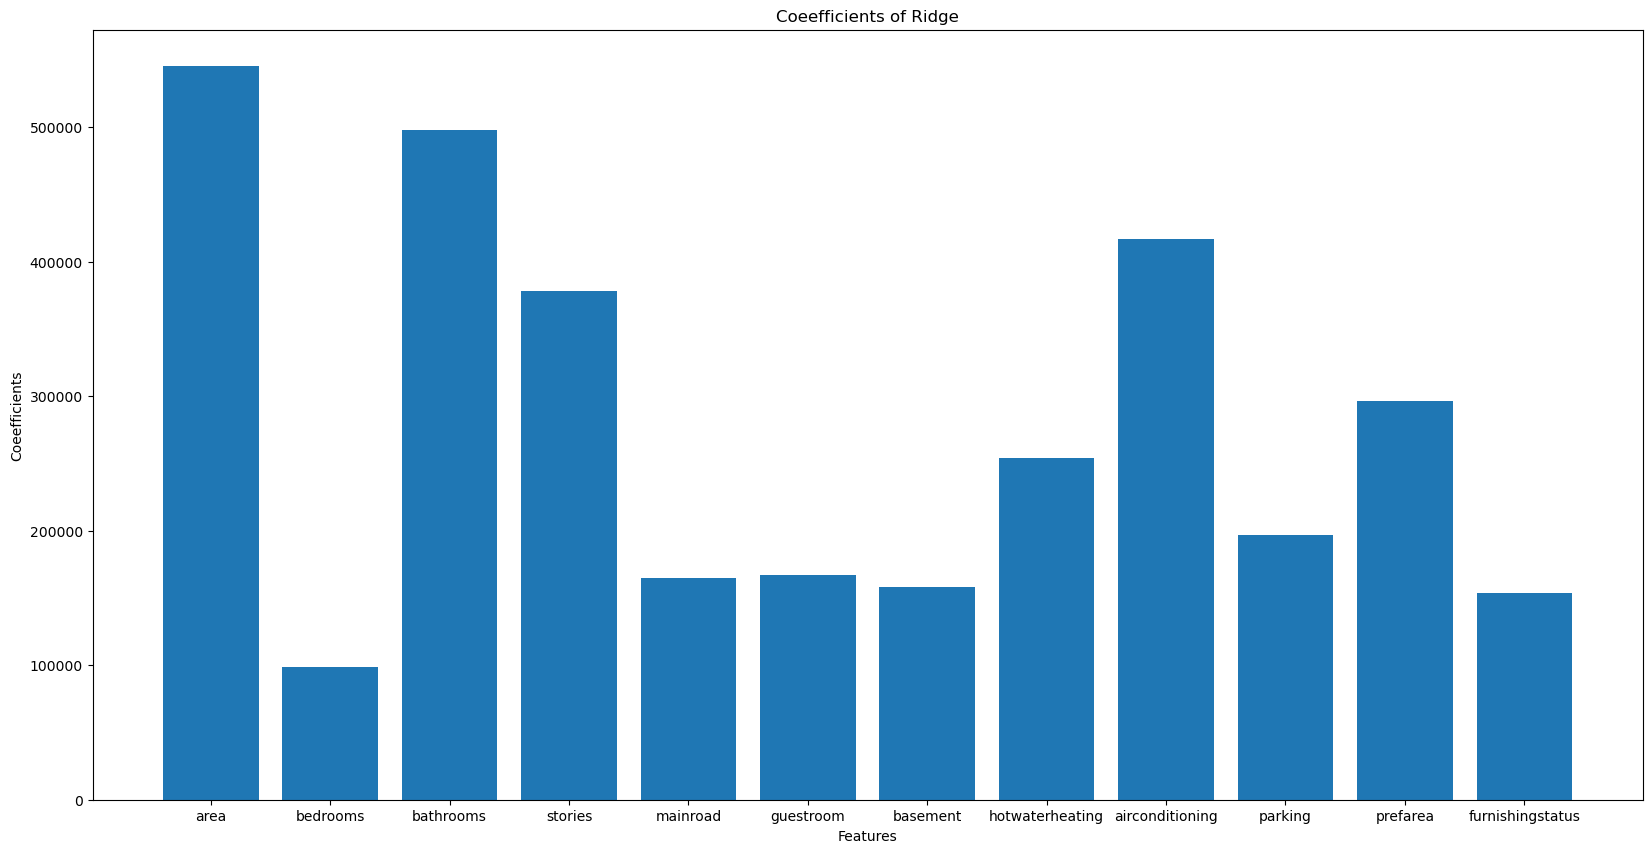

In [346]:
plt.figure(figsize=(20, 10))
plt.bar(x.columns, rr.coef_)
plt.title('Coeefficients of Ridge')
plt.xlabel('Features')
plt.ylabel('Coeefficients')
plt.show()

In [347]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mean Squared Error

In [348]:
print(f'Mean Squared Error of Linear Regression: {mean_squared_error(y_test, lr.predict(x_test))}')
print(f'Mean Squared Error of Lasso: {mean_squared_error(y_test, la.predict(x_test))}')
print(f'Mean Squared Error of Ridge: {mean_squared_error(y_test, rr.predict(x_test))}')

Mean Squared Error of Linear Regression: 962143429126.553
Mean Squared Error of Lasso: 962136297761.4249
Mean Squared Error of Ridge: 957738539267.4564


# Mean Absolute Error

In [349]:
print(f'Mean Absolute Error of Linear Regression: {mean_absolute_error(y_test, lr.predict(x_test))}')
print(f'Mean Absolute Error of Lasso: {mean_absolute_error(y_test, la.predict(x_test))}')
print(f'Mean Absolute Error of Ridge: {mean_absolute_error(y_test, rr.predict(x_test))}')

Mean Absolute Error of Linear Regression: 714609.6299945985
Mean Absolute Error of Lasso: 714605.8553723848
Mean Absolute Error of Ridge: 712682.6148316616


In [350]:
df = pd.DataFrame({"col-name":x.columns,"Linear Regression":lr.coef_,"Lasso":la.coef_,"Ridge":rr.coef_})
df

,col-name,Linear Regression,Lasso,Ridge
0,area,550543.723762,550542.618959,545095.660696
1,bedrooms,95234.943584,95234.315408,98998.588745
2,bathrooms,501816.141153,501814.917965,497490.387241
3,stories,381539.022110,381536.357027,378076.170361
4,mainroad,164503.111771,164500.061267,164816.265356
5,guestroom,166460.176088,166457.977758,166764.306947
6,basement,159456.228055,159453.228176,157939.992989
7,hotwaterheating,258340.859296,258334.724821,254290.621888
8,airconditioning,419604.634244,419601.556037,416623.997185
9,parking,195907.685330,195906.507739,197097.005247
